In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading customer features
customer_features = pd.read_csv("../output/customer_features.csv", index_col="CustomerID")

In [4]:
# Data Exploration
print("Customer Features:\n", customer_features.head())
print("\nDataset Info:\n")
print(customer_features.info())
print("\nSummary Statistics:\n")
print(customer_features.describe())

Customer Features:
             TotalTransactions  TotalAmountSpent  AvgTransactionValue
CustomerID                                                          
C0001                       5           3354.52              670.904
C0002                       4           1862.74              465.685
C0003                       4           2725.38              681.345
C0004                       8           5354.88              669.360
C0005                       3           2034.24              678.080

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, C0001 to C0200
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalTransactions    199 non-null    int64  
 1   TotalAmountSpent     199 non-null    float64
 2   AvgTransactionValue  199 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.2+ KB
None

Summary Statistics:

       TotalTransactions  TotalAmountSpent  AvgT

In [5]:
# Visualizing feature distributions
features_to_plot = ["TotalTransactions", "TotalAmountSpent", "AvgTransactionValue"]

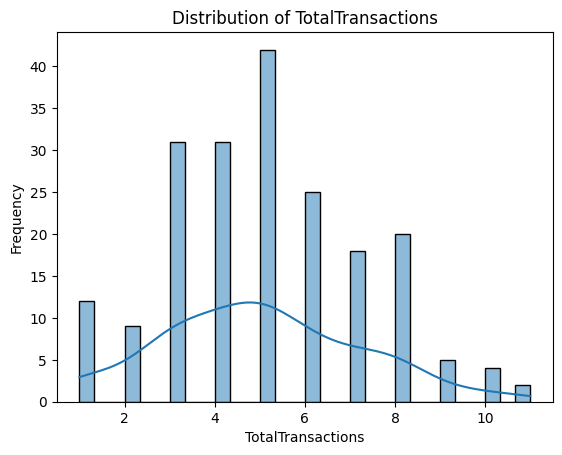

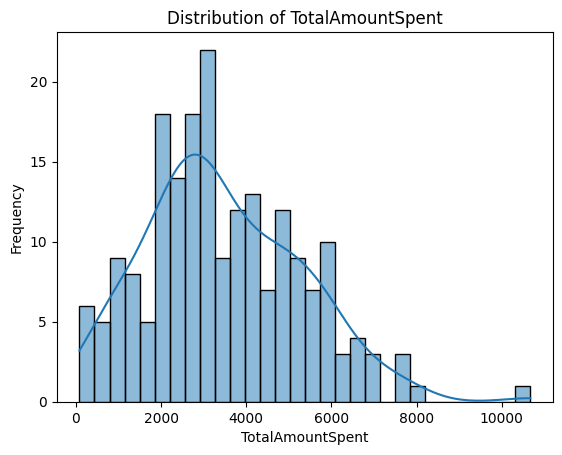

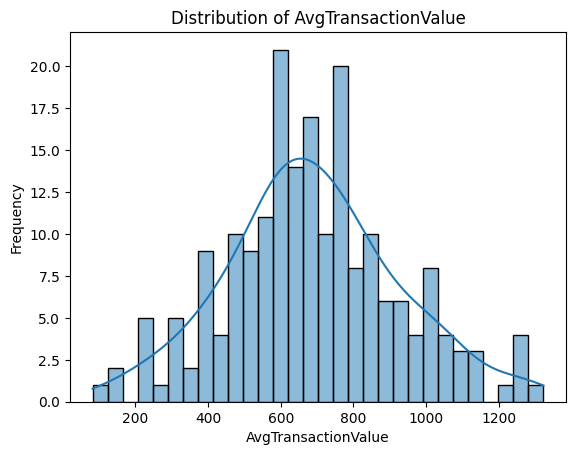

In [6]:
for feature in features_to_plot:
    sns.histplot(customer_features[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

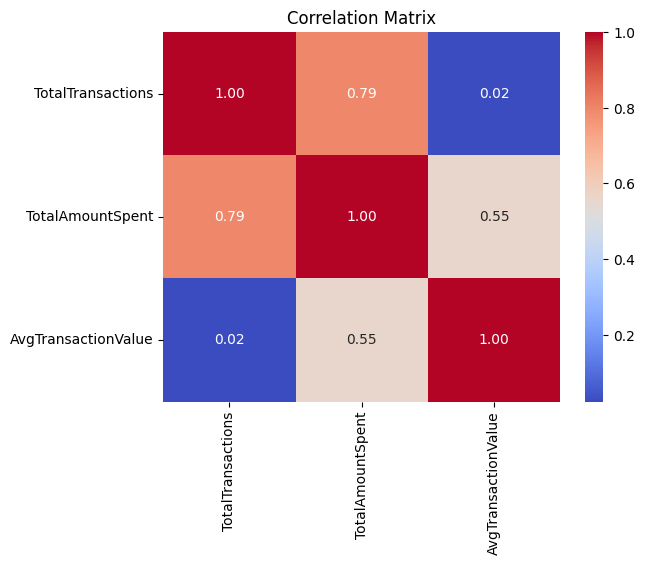

In [7]:
# Generating Correlation heatmap
sns.heatmap(customer_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Data Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

In [9]:
# Using Elbow Method to Determine Optimal Clusters
inertia = []
cluster_range = range(2, 11)  # Testing between the range of 2 to 10 clusters

Length of cluster_range: 9
Length of inertia: 9


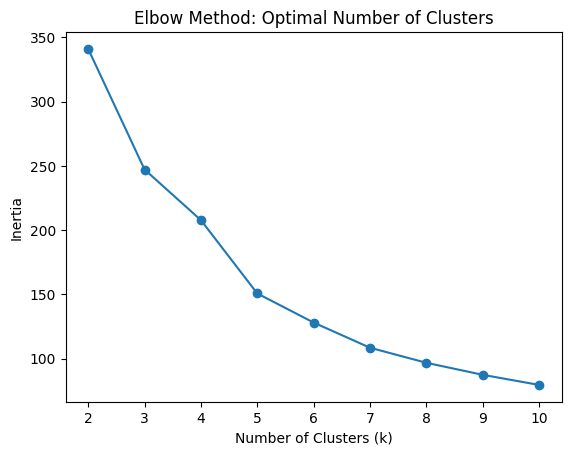

In [13]:
# Defining range for cluster numbers
cluster_range = range(2, 11)  # Testing k from 2 to 10

# Calculating inertia for each k
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Debugging: Ensure lengths match
print("Length of cluster_range:", len(list(cluster_range)))
print("Length of inertia:", len(inertia))

# Plot the Elbow Curve
plt.plot(list(cluster_range), inertia, marker="o")
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [14]:
# Fitting KMeans Model with Optimal Clusters
optimal_k = 4  # Set based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [15]:
# Adding Cluster Labels to DataFrame
customer_features["Cluster"] = clusters

In [17]:
# Cluster Analysis
print("\nCluster Counts:\n", customer_features["Cluster"].value_counts())


Cluster Counts:
 Cluster
1    60
0    58
3    53
2    28
Name: count, dtype: int64


In [18]:
# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.31


In [19]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 1.06


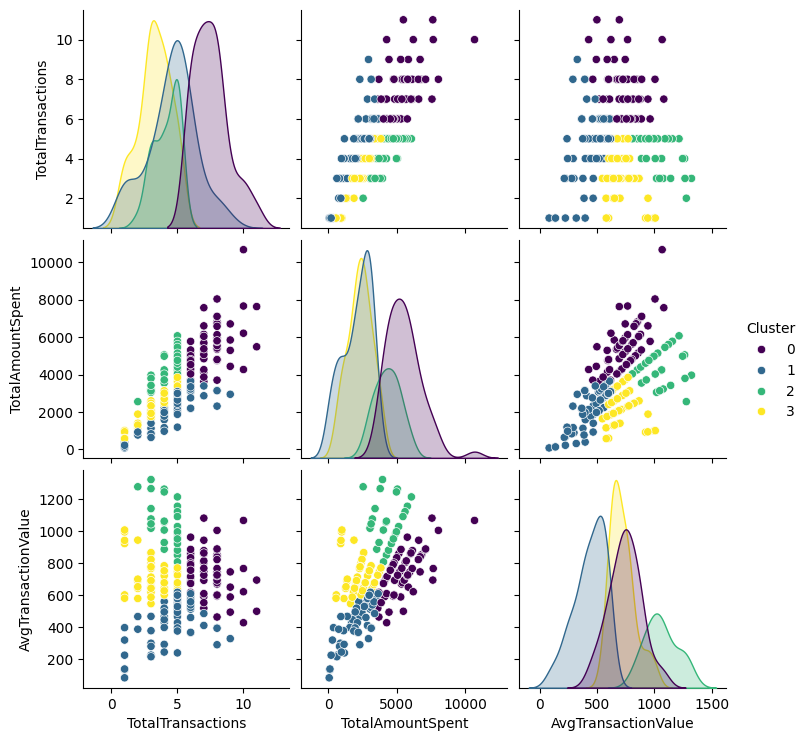

In [20]:
# Visualizing Clusters with Pairplot
sns.pairplot(customer_features, hue="Cluster", diag_kind="kde", palette="viridis")
plt.show()

In [21]:
# Saving Clustered Data
customer_features.to_csv("../output/customer_clusters.csv", index=True)

print("\nClustering completed and saved to '../output/customer_clusters.csv'.")


Clustering completed and saved to '../output/customer_clusters.csv'.
